# **IAB Data Analysis & Visualization**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving IAB Cleaned Data.csv to IAB Cleaned Data (7).csv


# Objective 1: Total Number of Architectural Firms

In [ ]:
total_firms = df['Company Name'].nunique()
print(f"Total architectural firms registered with IAB: {total_firms}")

Total architectural firms registered with IAB: 142


# Objective 2: Group Firms by Establishment Year Into 5-Year Periods

<ipython-input-64-a49b1cadd0e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estab_counts.index, y=estab_counts.values, palette="viridis")


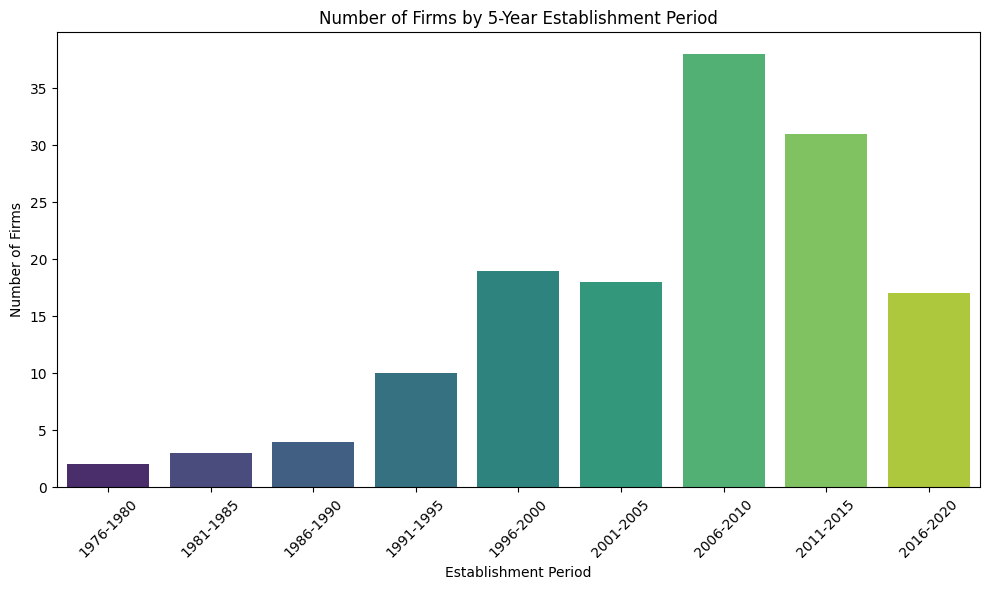

In [ ]:
estab_counts = df['5 Years Period'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=estab_counts.index, y=estab_counts.values, palette="viridis")
plt.title('Number of Firms by 5-Year Establishment Period')
plt.xlabel('Establishment Period')
plt.ylabel('Number of Firms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Objective 3: Total Manpower and Distinction Between IAB-Member and Non-Member Architects

In [ ]:
# In Numbers

total_iab_members = df['IAB Member Architect'].sum()
total_arch_graduates = df['Architectural Graduate'].sum()
total_architects = df['Total'].sum()

print(f"Total Manpower:\n")
print(f"IAB-Member Architects: {total_iab_members}")
print(f"Architectural Graduates: {total_arch_graduates}")
print(f"Total Architects: {total_architects}")

Total Manpower:

IAB-Member Architects: 356
Architectural Graduates: 404
Total Architects: 760


<ipython-input-60-bf3795a33cd7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_manpower, x='Metric', y='Count', palette='viridis')


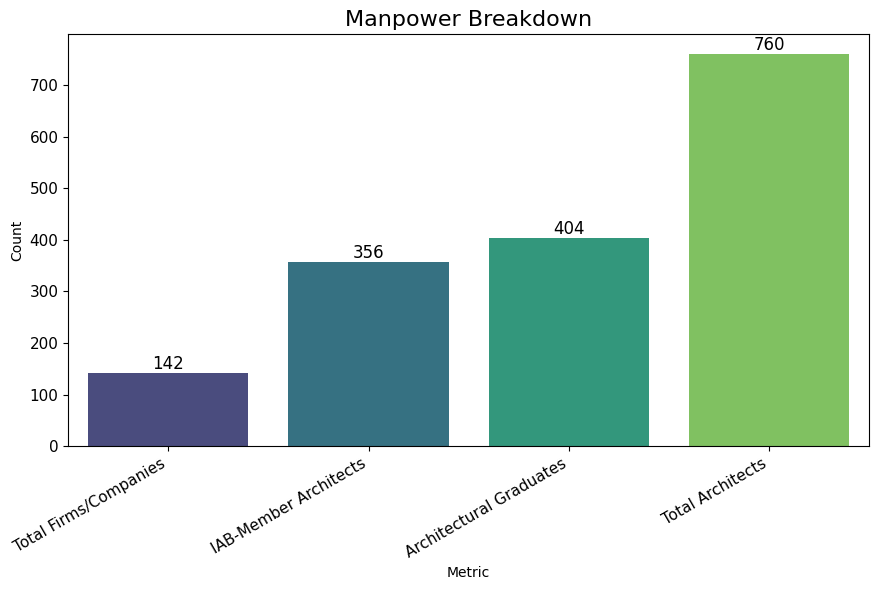

In [ ]:
# Data
manpower_data = {
    'Metric': ['Total Firms/Companies', 'IAB-Member Architects', 'Architectural Graduates', 'Total Architects'],
    'Count': [142, 356, 404, 760]
}
df_manpower = pd.DataFrame(manpower_data)

# Plot
plt.figure(figsize=(9, 6))
ax = sns.barplot(data=df_manpower, x='Metric', y='Count', palette='viridis')

# Add text labels above bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12
    )

# Styling
plt.title('Manpower Breakdown', fontsize=16)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Objective 4: Firms With Active Websites

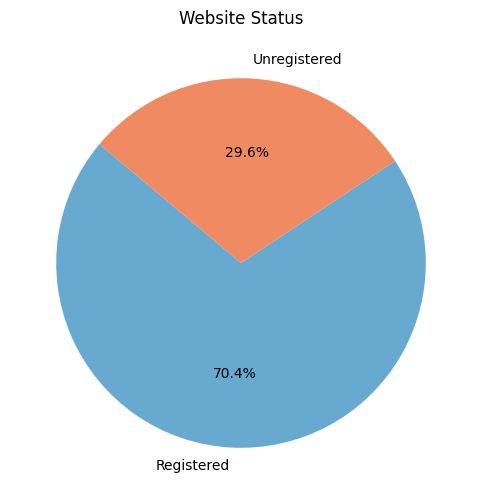

In [ ]:
# Website Status with Cool-Warm Color Theme

import matplotlib.pyplot as plt

website_status_counts = {'Registered': 100, 'Unregistered': 42}
labels = list(website_status_counts.keys())
sizes = list(website_status_counts.values())
colors = ['#67a9cf', '#ef8a62']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Website Status')
plt.show()

<ipython-input-52-9e30069a9534>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_establishment, x='Period', y='Firms', palette='magma')


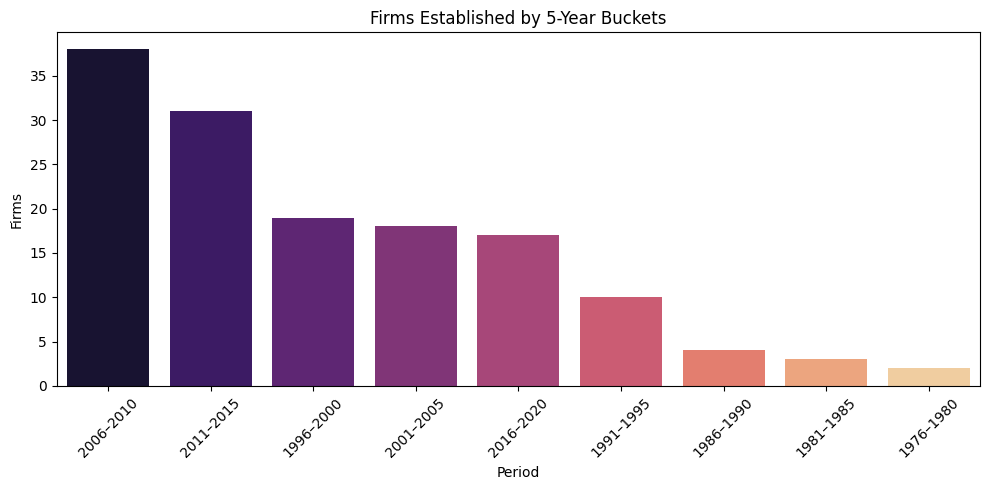

In [ ]:
# Establishment Year Analysis (Bar chart of firms by 5-year buckets)
establishment_periods = {
    '2006–2010': 38,
    '2011–2015': 31,
    '1996–2000': 19,
    '2001–2005': 18,
    '2016–2020': 17,
    '1991–1995': 10,
    '1986–1990': 4,
    '1981–1985': 3,
    '1976–1980': 2
}
df_establishment = pd.DataFrame({
    'Period': list(establishment_periods.keys()),
    'Firms': list(establishment_periods.values())
})

plt.figure(figsize=(10,5))
sns.barplot(data=df_establishment, x='Period', y='Firms', palette='magma')
plt.title('Firms Established by 5-Year Buckets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

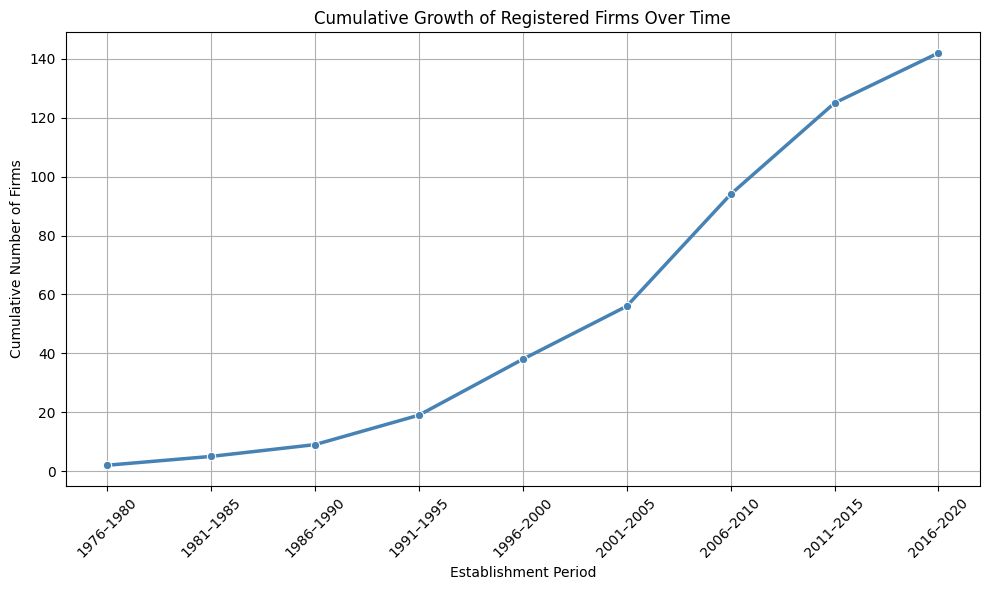

In [ ]:
# Establishment period data
establishment_periods = {
    '1976–1980': 2,
    '1981–1985': 3,
    '1986–1990': 4,
    '1991–1995': 10,
    '1996–2000': 19,
    '2001–2005': 18,
    '2006–2010': 38,
    '2011–2015': 31,
    '2016–2020': 17
}

# Convert to DataFrame
df_cumulative = pd.DataFrame({
    'Period': list(establishment_periods.keys()),
    'Firms': list(establishment_periods.values())
})

# Prepare data for plotting
df_cumulative['Start Year'] = df_cumulative['Period'].str.slice(0, 4).astype(int)
df_cumulative = df_cumulative.sort_values('Start Year')
df_cumulative['Cumulative Firms'] = df_cumulative['Firms'].cumsum()

# Plot with a cool warm blue color
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_cumulative,
    x='Period',
    y='Cumulative Firms',
    marker='o',
    linewidth=2.5,
    color='#4682B4'  # Steel Blue
)
plt.title('Cumulative Growth of Registered Firms Over Time')
plt.xlabel('Establishment Period')
plt.ylabel('Cumulative Number of Firms')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Objective 5: Firms Using Professional Email Addresses

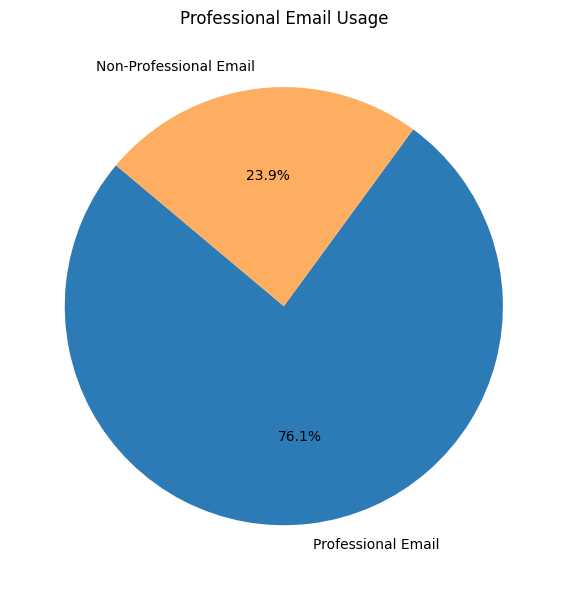

In [ ]:
# Function to check for professional email
def is_professional_email(email):
    if pd.isna(email):
        return False
    common_domains = ['gmail.com', 'yahoo.com', 'hotmail.com', 'outlook.com', 'yahoo.co.bd']
    return not any(domain in email.lower() for domain in common_domains)

# Apply to dataframe
df['Professional Email'] = df['Email ID'].apply(is_professional_email)
email_counts = df['Professional Email'].value_counts()

# New cool-warm colors
colors = ['#2C7BB6', '#FDAE61']  # Teal & Peach

# Plot
plt.figure(figsize=(6, 6))
email_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Professional Email', 'Non-Professional Email'],
    colors=colors,
    startangle=140
)
plt.title('Professional Email Usage')
plt.ylabel('')
plt.tight_layout()
plt.show()


# Objective 6: Firms by Location Inside vs Outside Dhaka

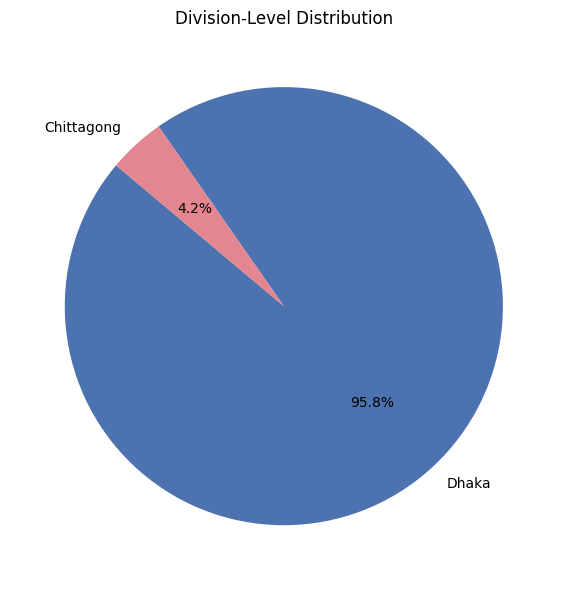

In [ ]:
# Geographic Segmentation - Division Level Pie Chart
division_data = {'Dhaka': 95.8, 'Chittagong': 4.2}
colors = ['#4C72B0', '#E38690']  # Coolworm palette

plt.figure(figsize=(6, 6))
plt.pie(
    division_data.values(),
    labels=division_data.keys(),
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title('Division-Level Distribution')
plt.tight_layout()
plt.show()

# Leadership Roles

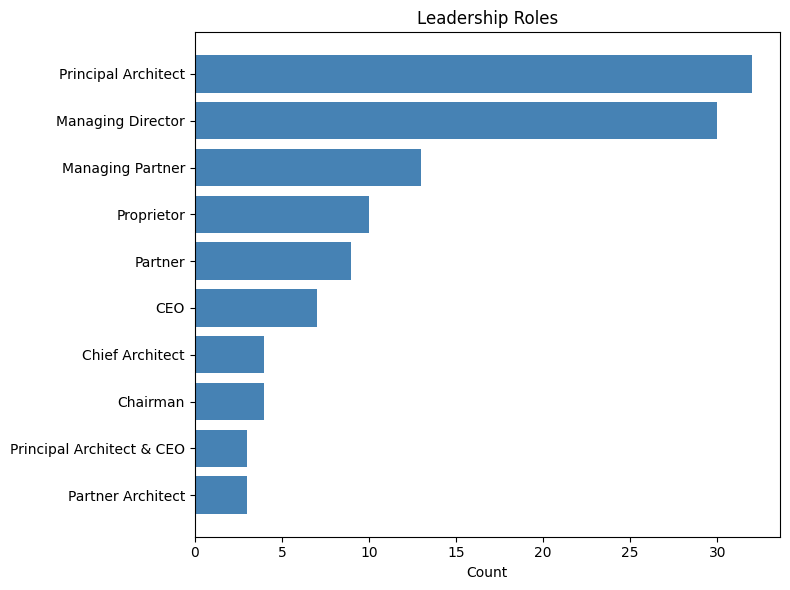

In [ ]:
# Leadership Designations (Funnel Chart - Horizontal bar plot)
leadership_counts = {
    'Principal Architect': 32,
    'Managing Director': 30,
    'Managing Partner': 13,
    'Proprietor': 10,
    'Partner': 9,
    'CEO': 7,
    'Chairman': 4,
    'Chief Architect': 4,
    'Principal Architect & CEO': 3,
    'Partner Architect': 3
}
df_leadership = pd.DataFrame({
    'Designation': list(leadership_counts.keys()),
    'Count': list(leadership_counts.values())
}).sort_values('Count', ascending=True)

plt.figure(figsize=(8,6))
plt.barh(df_leadership['Designation'], df_leadership['Count'], color='steelblue')
plt.title('Leadership Roles')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Objective 7: Segment Company Locations at Police Station (Thana) Level

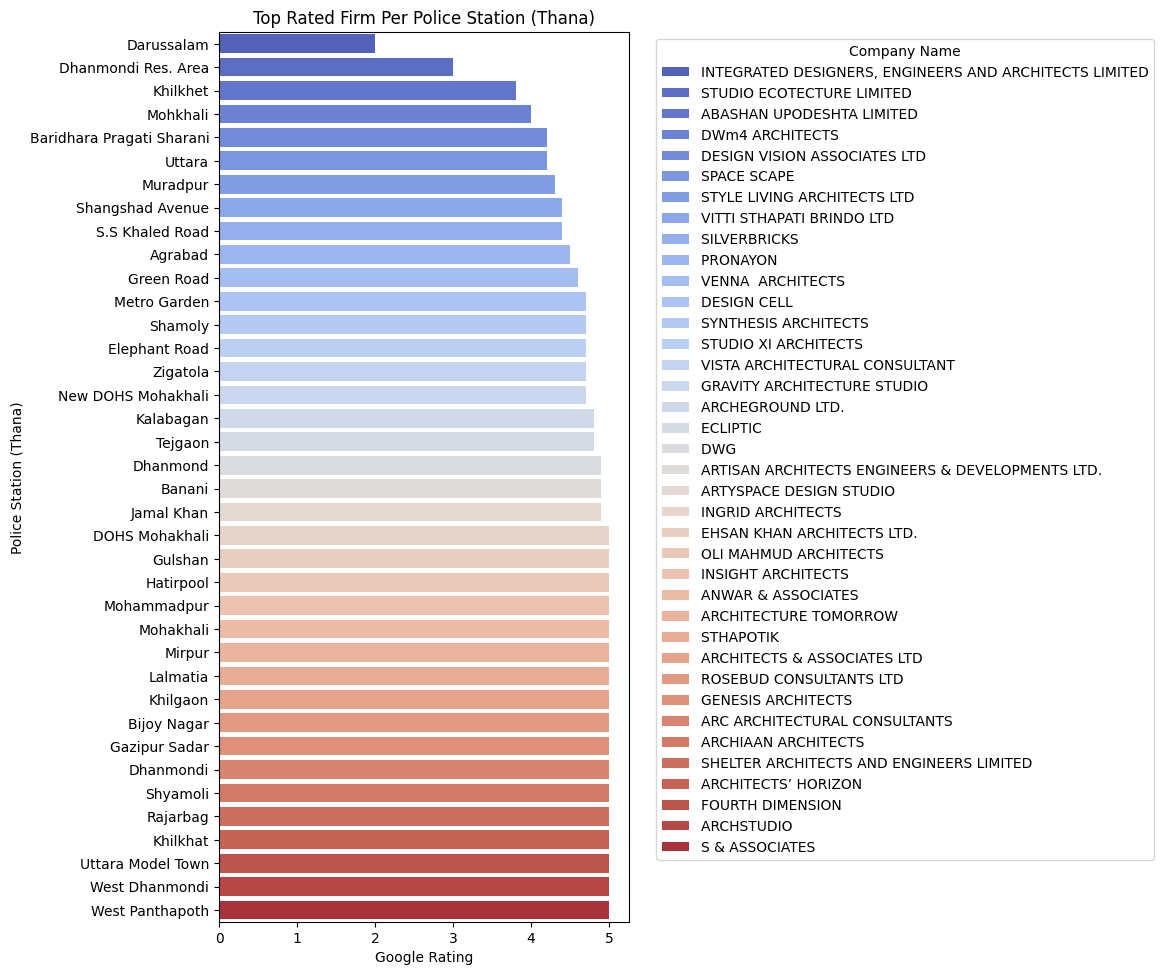

In [ ]:
df['Thana'] = df['Thana'].astype(str).str.strip()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop firms without a rating
rated_df = df.dropna(subset=['Rating'])

# Get top-rated firm per Thana
top_firms_by_thana = rated_df.loc[rated_df.groupby('Thana')['Rating'].idxmax()]

# Sort by rating (optional: sort by thana name)
top_firms_by_thana = top_firms_by_thana.sort_values('Rating', ascending=True)

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(
    data=top_firms_by_thana,
    x='Rating',
    y='Thana',
    hue='Company Name',
    dodge=False,
    palette='coolwarm'
)

plt.title('Top Rated Firm Per Police Station (Thana)')
plt.xlabel('Google Rating')
plt.ylabel('Police Station (Thana)')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Objective 8: Analyze Google Ratings and Geo-Location

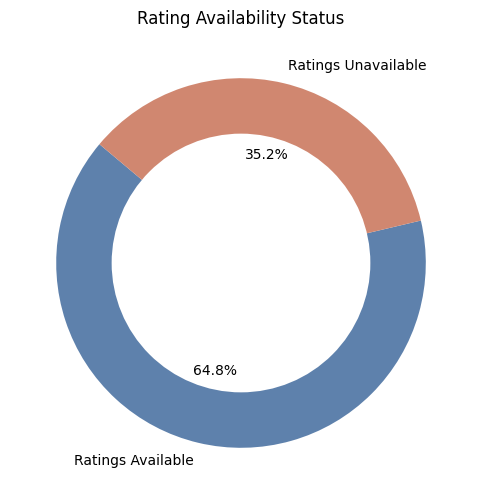

In [ ]:
# Google Ratings Analysis - Availability (Donut Chart)
rating_status = {'Ratings Available': 64.8, 'Ratings Unavailable': 35.2}

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    rating_status.values(), labels=rating_status.keys(),
    autopct='%1.1f%%', startangle=140, colors=['#5E81AC', '#D08770']
)
# Draw circle for donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Rating Availability Status')
plt.show()

<ipython-input-21-379393cca4ea>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ratings, x='Rating', y='Firms', palette='coolwarm')


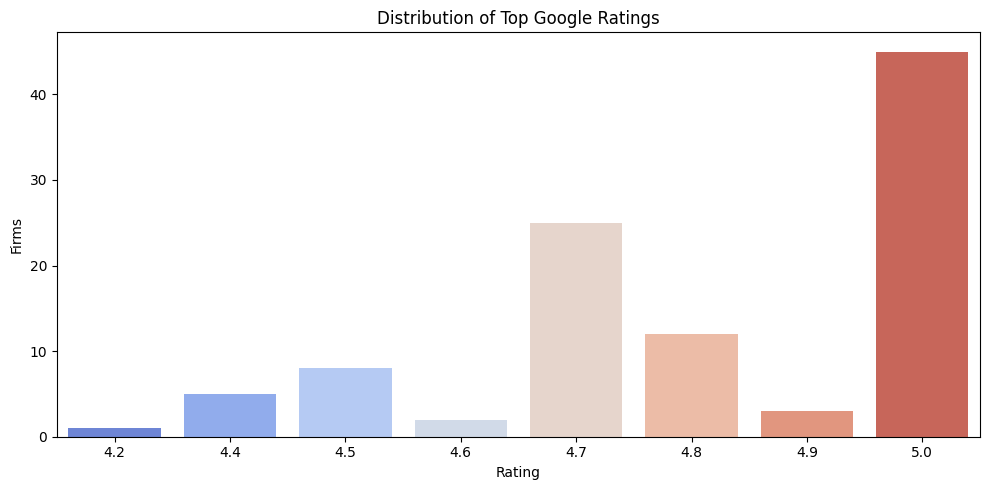

In [ ]:
# 4.7.2 Ratings by Users (Bar chart)
ratings_counts = {
    5.0: 45,
    4.7: 25,
    4.8: 12,
    4.5: 8,
    4.4: 5,
    4.9: 3,
    4.6: 2,
    4.2: 1
}
df_ratings = pd.DataFrame({
    'Rating': list(ratings_counts.keys()),
    'Firms': list(ratings_counts.values())
}).sort_values('Rating', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_ratings, x='Rating', y='Firms', palette='coolwarm')
plt.title('Distribution of Top Google Ratings')
plt.tight_layout()
plt.show()

# Objective 10: Identify top 3 firms in each Thana by Experience and Rating

<ipython-input-23-b52844ccc782>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_firms_per_thana['Firm Label'] = top3_firms_per_thana['Company Name'] + " (" + top3_firms_per_thana['Thana'] + ")"


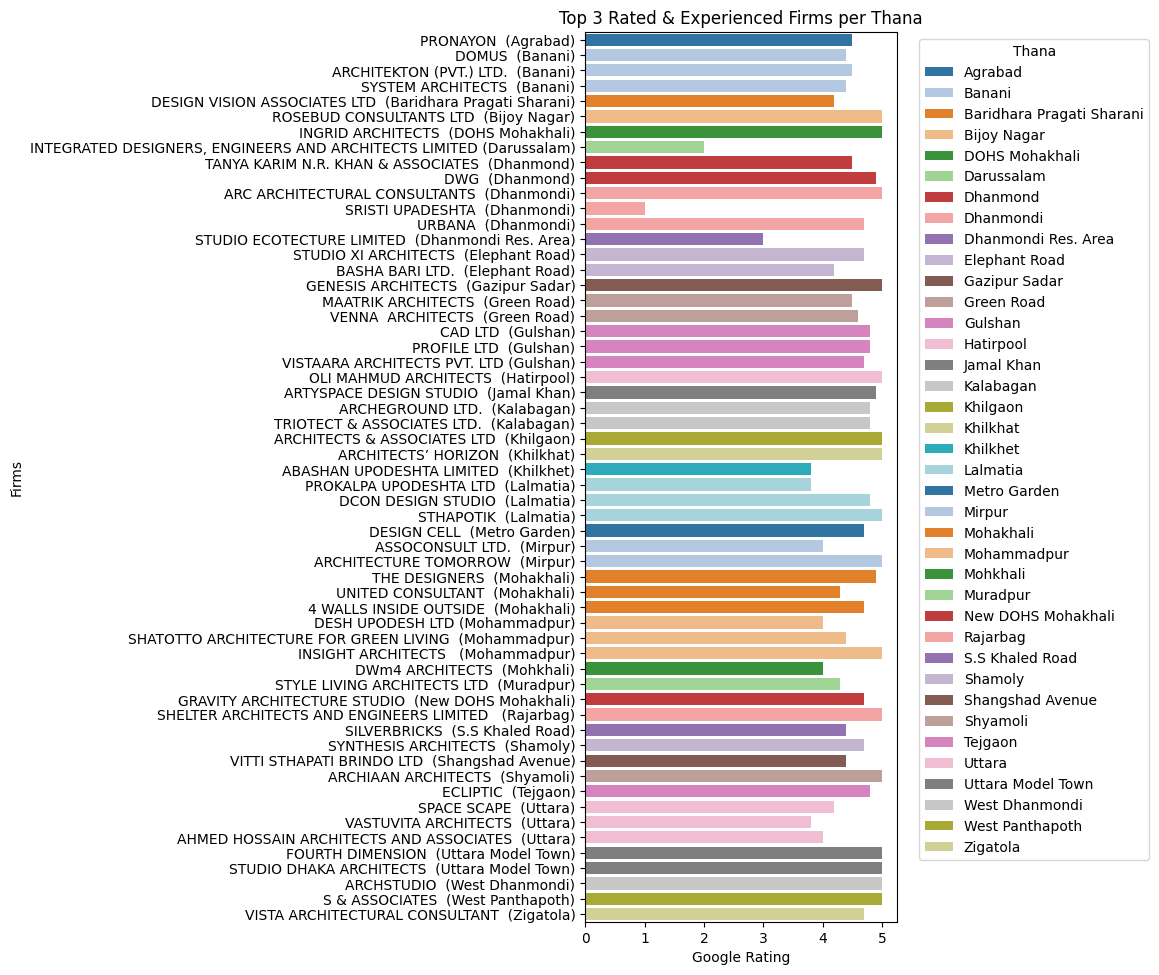

In [ ]:
# Ensure numeric types
df['EstablishedYear'] = pd.to_numeric(df['EstablishedYear'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with missing data
df_clean = df.dropna(subset=['EstablishedYear', 'Rating', 'Thana'])

# Sort by Thana, experience (older = lower year), and rating (higher is better)
df_sorted = df_clean.sort_values(by=['Thana', 'EstablishedYear', 'Rating'], ascending=[True, True, False])

# Pick top 3 firms per Thana
top3_firms_per_thana = df_sorted.groupby('Thana').head(3)

# Create a label for each firm
top3_firms_per_thana['Firm Label'] = top3_firms_per_thana['Company Name'] + " (" + top3_firms_per_thana['Thana'] + ")"

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(
    data=top3_firms_per_thana,
    x='Rating',
    y='Firm Label',
    hue='Thana',
    dodge=False,
    palette='tab20'
)

plt.xlabel('Google Rating')
plt.ylabel('Firms')
plt.title('Top 3 Rated & Experienced Firms per Thana')
plt.legend(title='Thana', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Objective 9 & 11: Predict Estimate Project Completions, Professionalism & Quality


<ipython-input-24-d2196a967cbe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pro_firms.sort_values('Rating', ascending=False), x='Rating', y='Company Name', palette='viridis')


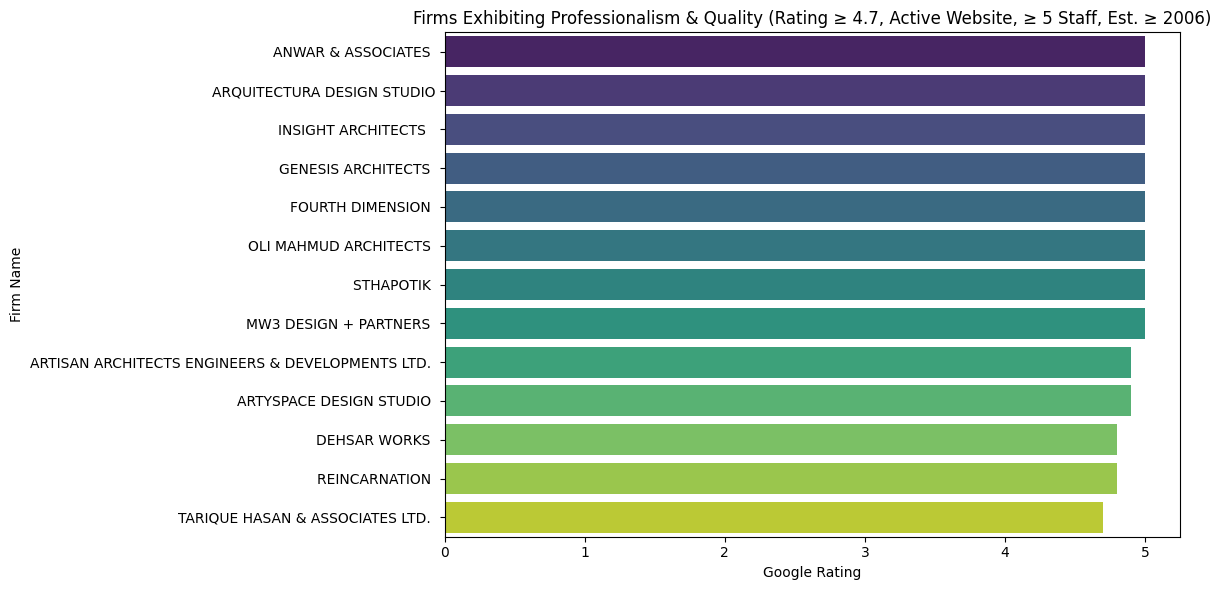

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Filter for firms meeting professionalism & quality criteria
pro_firms = df[
    (df['Rating'] >= 4.7) &
    (df['5 Years Period'] >= '2006-2010') &
    (df['Website Status'].str.lower() == 'registered') &
    (df['Total'] >= 5)
]

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pro_firms.sort_values('Rating', ascending=False), x='Rating', y='Company Name', palette='viridis')
plt.title('Firms Exhibiting Professionalism & Quality (Rating ≥ 4.7, Active Website, ≥ 5 Staff, Est. ≥ 2006)')
plt.xlabel('Google Rating')
plt.ylabel('Firm Name')
plt.tight_layout()
plt.show()

# Objective 12: Specialization

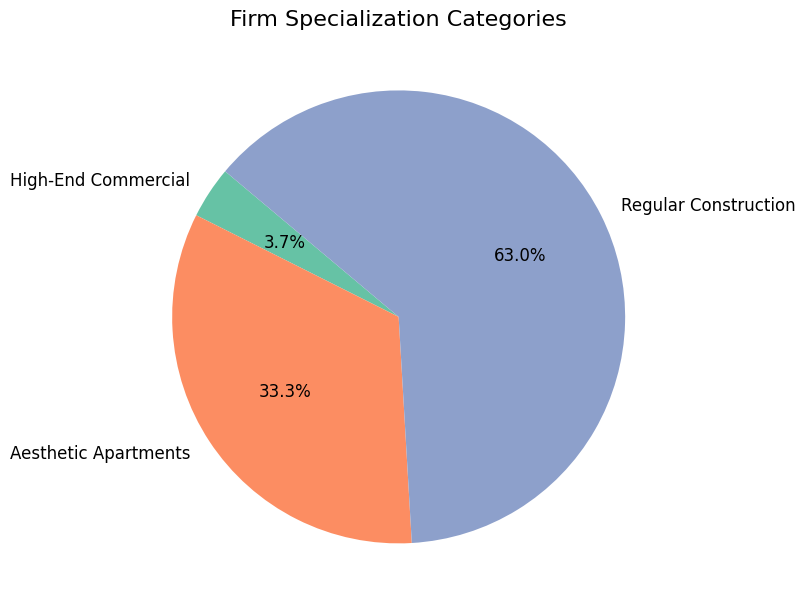

In [ ]:
# Ensure numeric conversion
df['Architectural Graduate'] = pd.to_numeric(df['Architectural Graduate'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Define firm categories
high_end = df[df['Thana'].isin(['Gulshan', 'Banani', 'Uttara']) & (df['Total'] >= 8)]
aesthetic = df[(df['Architectural Graduate'] >= 5) & (df['Rating'] >= 4.8)]
regular = df[(df['Total'] <= 3) & (df['Website Status'].str.lower() == 'unregistered')]

# Combine into DataFrame
specialization = pd.DataFrame({
    'Category': ['High-End Commercial', 'Aesthetic Apartments', 'Regular Construction'],
    'Firm Count': [len(high_end), len(aesthetic), len(regular)]
})

# Optional: define custom colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # light green, orange, blue

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    specialization['Firm Count'],
    labels=specialization['Category'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title('Firm Specialization Categories', fontsize=16)
plt.tight_layout()
plt.show()

# Objective 13: Fee-Charging Predictions

<ipython-input-60-2e314536cdfa>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fee_segment, x='Fee Category', y='Firm Count', palette='coolwarm')


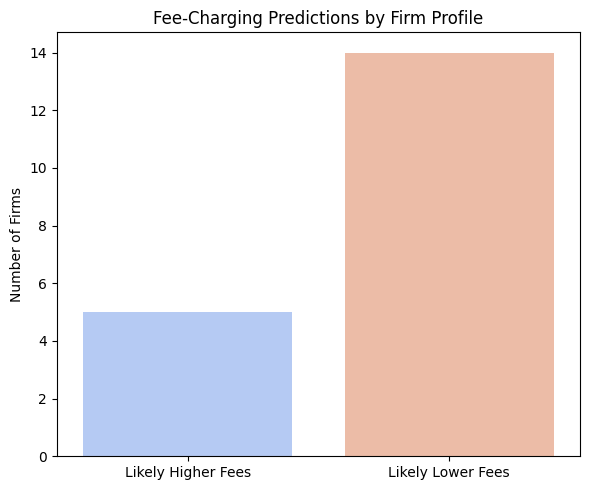


🔺 Likely Higher Fee Firms:
          Company Name  Rating  Total Website Status
         DEHSAR WORKS      4.8      9     Registered
     FOURTH DIMENSION      5.0     14     Registered
MW3 DESIGN + PARTNERS      5.0     10     Registered
          PROFILE LTD      4.8     67     Registered
        REINCARNATION      4.8     11     Registered

🔻 Likely Lower Fee Firms:
                            Company Name  Rating  Total Website Status
       ARCHITECTES CONTEMPORAIN (ARCON)      NaN      4   Unregistered
                               ARC.IN.D      NaN      1   Unregistered
        ARCHINET ARCHITECTS & ENGINEERS      NaN      3   Unregistered
                     ARESCON CONSULTANT      NaN      3   Unregistered
                       ANGON ARCHITECTS      NaN      3   Unregistered
                   ARC ANGON CONSORTIUM      NaN      0   Unregistered
BABUIBASHA: A SUSTAINABLE ARCHITECTURE.      NaN      4   Unregistered
                         H I ARCHITECTS      NaN      1   U

In [ ]:
# Load the dataset
df = pd.read_csv('IAB Cleaned Data.csv')

# Ensure numeric columns are parsed correctly
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Website Status'] = df['Website Status'].astype(str)

# ---- Fee-Charging Predictions ---- #

# Likely Higher Fees: Strict Criteria
higher_fee = df[
    (df['Rating'] >= 4.8) &
    (df['Total'] >= 8) &
    (df['Website Status'].str.lower() == 'registered')
]

# Likely Lower Fees: RELAXED Criteria for better visibility
lower_fee = df[
    (
        (df['Rating'] < 4.0) | (df['Rating'].isna())
    ) &
    (df['Total'] <= 4) &
    (df['Website Status'].str.lower() == 'unregistered')
]

# Summary DataFrame
fee_segment = pd.DataFrame({
    'Fee Category': ['Likely Higher Fees', 'Likely Lower Fees'],
    'Firm Count': [len(higher_fee), len(lower_fee)]
})

# Bar chart visualization
plt.figure(figsize=(6, 5))
sns.barplot(data=fee_segment, x='Fee Category', y='Firm Count', palette='coolwarm')
plt.title('Fee-Charging Predictions by Firm Profile')
plt.ylabel('Number of Firms')
plt.xlabel('')
plt.tight_layout()
plt.show()

# ---- Display Firms ---- #

print("\n🔺 Likely Higher Fee Firms:")
if not higher_fee.empty:
    print(higher_fee[['Company Name', 'Rating', 'Total', 'Website Status']].to_string(index=False))
else:
    print("No firms found matching the criteria.")

print("\n🔻 Likely Lower Fee Firms:")
if not lower_fee.empty:
    print(lower_fee[['Company Name', 'Rating', 'Total', 'Website Status']].to_string(index=False))
else:
    print("No firms found matching the criteria.")

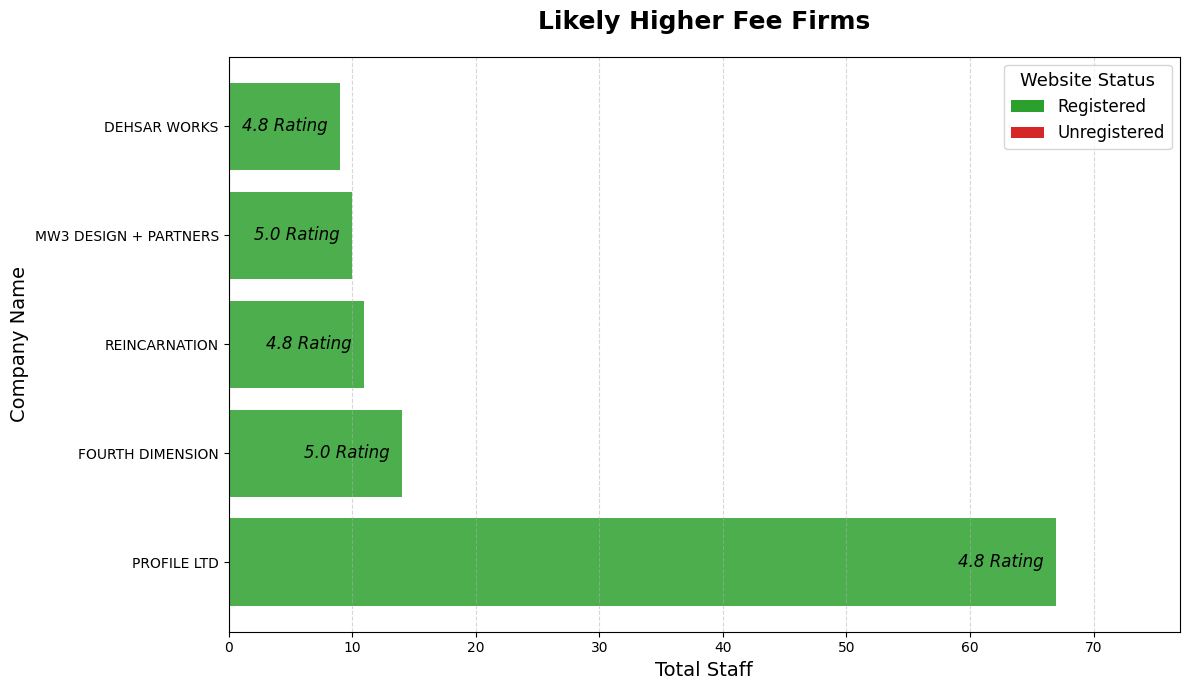

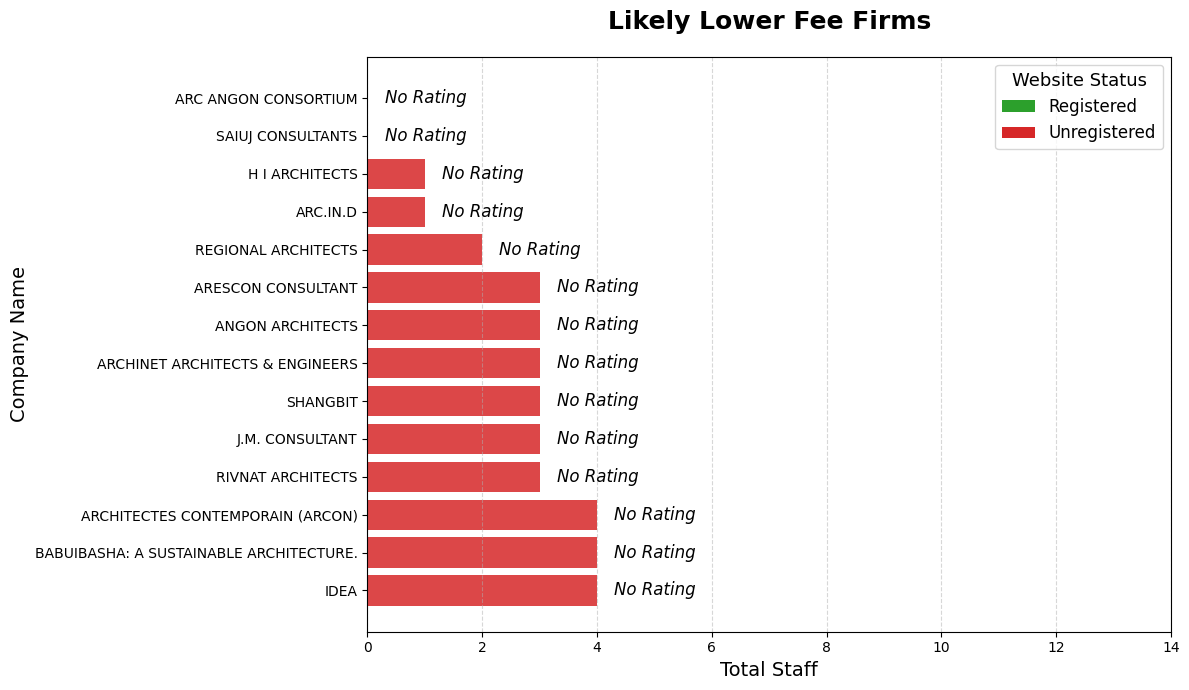

In [ ]:
# Data
higher_fee_firms = {
    'Company Name': [
        'DEHSAR WORKS', 'FOURTH DIMENSION', 'MW3 DESIGN + PARTNERS',
        'PROFILE LTD', 'REINCARNATION'
    ],
    'Rating': [4.8, 5.0, 5.0, 4.8, 4.8],
    'Total': [9, 14, 10, 67, 11],
    'Website Status': ['Registered'] * 5
}

lower_fee_firms = {
    'Company Name': [
        'ARCHITECTES CONTEMPORAIN (ARCON)', 'ARC.IN.D', 'ARCHINET ARCHITECTS & ENGINEERS',
        'ARESCON CONSULTANT', 'ANGON ARCHITECTS', 'ARC ANGON CONSORTIUM',
        'BABUIBASHA: A SUSTAINABLE ARCHITECTURE.', 'H I ARCHITECTS', 'IDEA',
        'J.M. CONSULTANT', 'REGIONAL ARCHITECTS', 'RIVNAT ARCHITECTS',
        'SAIUJ CONSULTANTS', 'SHANGBIT'
    ],
    'Rating': [np.nan]*14,
    'Total': [4, 1, 3, 3, 3, 0, 4, 1, 4, 3, 2, 3, 0, 3],
    'Website Status': ['Unregistered']*14
}

df_higher = pd.DataFrame(higher_fee_firms).sort_values('Total', ascending=True)
df_lower = pd.DataFrame(lower_fee_firms).sort_values('Total', ascending=True)

# Color mapping
color_map = {'Registered': '#2ca02c', 'Unregistered': '#d62728'}

def plot_firms(df, title):
    fig, ax = plt.subplots(figsize=(12, 7))

    bars = ax.barh(
        df['Company Name'], df['Total'],
        color=[color_map[status] for status in df['Website Status']],
        alpha=0.85
    )

    ax.set_title(title, fontsize=18, weight='bold', pad=20)
    ax.set_xlabel('Total Staff', fontsize=14)
    ax.set_ylabel('Company Name', fontsize=14)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_xlim(0, df['Total'].max() + 10)
    ax.invert_yaxis()

    # Annotate ratings or No Rating
    for i, (total, rating) in enumerate(zip(df['Total'], df['Rating'])):
        if pd.isna(rating):
            rating_text = "No Rating"
            color = 'black'
            ha = 'left'
            x_pos = total + 0.3
        else:
            rating_text = f'{rating} Rating'
            # Place rating inside bar if space, else outside
            if total > 5:
                color = 'black'
                ha = 'right'
                x_pos = total - 1
            else:
                color = 'black'
                ha = 'left'
                x_pos = total + 0.3

        ax.text(x_pos, i, rating_text, va='center', ha=ha, fontsize=12, fontstyle='italic', color=color)

    # Legend for Website Status
    legend_elements = [Patch(facecolor=color_map[key], label=key) for key in color_map]
    ax.legend(handles=legend_elements, title='Website Status', fontsize=12, title_fontsize=13, loc='upper right')

    plt.tight_layout()
    plt.show()

# Plot separately
plot_firms(df_higher, 'Likely Higher Fee Firms')
plot_firms(df_lower, 'Likely Lower Fee Firms')